<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Random Numbers (Good)</span></div>

## 1 Random numbers from other distributions

### 1.1 Random numbers from the Normal distribution

In [1]:
np.random.normal(loc=5, scale=2, size=10)

array([2.4388587 , 8.03329552, 3.70354709, 4.64134178, 3.49100258,
       3.9350537 , 4.36247269, 7.1708527 , 5.72598809, 5.48414839])

### 1.2 Visualising the random numbers

Text(0, 0.5, 'Value of random number')

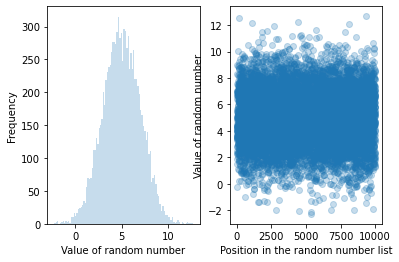

In [3]:
import matplotlib.pyplot as plt

n = 1_000_0
random_numbers = np.random.normal(loc=5, scale=2, size=n)

fig, ax = plt.subplots(nrows=1, ncols=2)

axis = ax[0]
axis.hist(random_numbers, bins=100, alpha=.25)
axis.set_xlabel("Value of random number")
axis.set_ylabel("Frequency")

axis = ax[1]
axis.scatter(range(n), random_numbers, alpha=.25)
axis.set_xlabel("Position in the random number list")
axis.set_ylabel("Value of random number")

### 1.3 68%?

In [4]:
n = 10_000
mean, sd = 5, 2
random_numbers = np.random.normal(loc=mean, scale=sd, size=n)

mask = (random_numbers >= mean - sd) & (random_numbers <= mean + sd)

print(f'% of points between 1 std.dev. from the mean: {np.sum(mask)/n*100:.2f}%')

% of points between 1 std.dev. from the mean: 68.38%


## 1 Brownian Motion in 1D

### 1.1 The scenario

### 1.2 The simulation

Text(0.5, 1.0, 'Probability distribution for 1D Random walk with p=0.5')

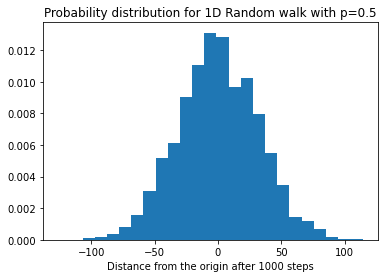

In [11]:
import numpy.random as rnd

def brown_1d(prob_right=.5, no_of_steps=10000):
    ''' 
        This function returns the final position of the particle 
        after the number of steps.
        prob_right is the probability of going right.
    '''

    step_size = 1    
    x = 0                               # starting x position

    for _ in range(no_of_steps):
        if rnd.random() < prob_right:   # Go right?
            x += step_size
        else:
            x -= step_size

    return x

no_of_steps, p = 1_000, .5
repeats = 10_000
results = [brown_1d(prob_right=p, no_of_steps=no_of_steps)
           for _ in range(repeats)]

plt.hist(results, bins=25, density=True)
plt.xlabel(f'Distance from the origin after {no_of_steps} steps')
plt.title(f'Probability distribution for 1D Random walk with p={p}')

Text(0.5, 1.0, 'Probability distribution for 1D Random walk with p=0.6')

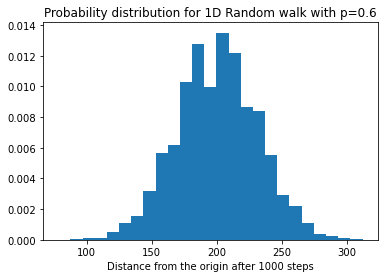

In [7]:
import numpy.random as rnd

def brown_1d(prob_right=.6, no_of_steps=10000):
    ''' 
        This function returns the final position of the particle 
        after the number of steps.
        prob_right is the probability of going right.
    '''

    step_size = 1    
    x = 0                               # starting x position

    for _ in range(no_of_steps):
        if rnd.random() < prob_right:   # Go right?
            x += step_size
        else:
            x -= step_size

    return x

no_of_steps, p = 1_000, .6
repeats = 10_000
results = [brown_1d(prob_right=p, no_of_steps=no_of_steps)
           for _ in range(repeats)]

plt.hist(results, bins=25, density=True)
plt.xlabel(f'Distance from the origin after {no_of_steps} steps')
plt.title(f'Probability distribution for 1D Random walk with p={p}')

### 1.3 What does theory say?

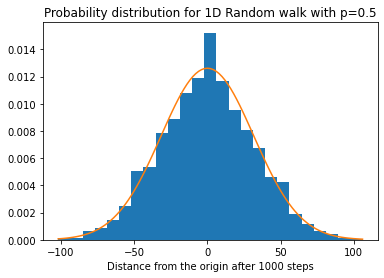

In [12]:
import numpy.random as rnd

def brown_1d(prob_right=.5, no_of_steps=10000):
    ''' 
        This function returns the final position of the particle 
        after the number of steps.
        prob_right is the probability of going right.
    '''

    step_size = 1    
    x = 0                               # starting x position

    for _ in range(no_of_steps):
        if rnd.random() < prob_right:   # Go right?
            x += step_size
        else:
            x -= step_size

    return x

no_of_steps, p = 1_000, .5
repeats = 10_000
results = [brown_1d(prob_right=p, no_of_steps=no_of_steps)
           for _ in range(repeats)]

plt.hist(results, bins=25, density=True)
plt.xlabel(f'Distance from the origin after {no_of_steps} steps')
plt.title(f'Probability distribution for 1D Random walk with p={p}')

def normal(x, m=0, s=1):
    '''
    Probability density function for the
    Gaussian distribution.
    '''
    s2 = s**2
    output = np.exp(-(x-m)**2/(2*s2))
    output /= np.sqrt(2*np.pi*s2)
    return output

prob_left = 1 - p                       # q = 1 -p
mean = no_of_steps * (p - prob_left)    # mean = N(p - q)
sd = np.sqrt(4*no_of_steps*p*prob_left) # sd = sqrt(4 N p q)
x = np.unique(results)                           # Numbers that form 
                                                 # the x-axis
plt.plot(x, normal(x, mean, sd), label='Theoretical')

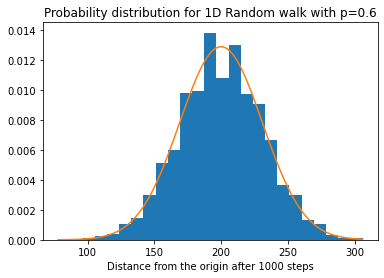

In [13]:
import numpy.random as rnd

def brown_1d(prob_right=.6, no_of_steps=10000):
    ''' 
        This function returns the final position of the particle 
        after the number of steps.
        prob_right is the probability of going right.
    '''

    step_size = 1    
    x = 0                               # starting x position

    for _ in range(no_of_steps):
        if rnd.random() < prob_right:   # Go right?
            x += step_size
        else:
            x -= step_size

    return x

no_of_steps, p = 1_000, .6
repeats = 10_000
results = [brown_1d(prob_right=p, no_of_steps=no_of_steps)
           for _ in range(repeats)]

plt.hist(results, bins=25, density=True)
plt.xlabel(f'Distance from the origin after {no_of_steps} steps')
plt.title(f'Probability distribution for 1D Random walk with p={p}')

prob_left = 1 - p                       # q = 1 -p
mean = no_of_steps * (p - prob_left)    # mean = N(p - q)
sd = np.sqrt(4*no_of_steps*p*prob_left) # sd = sqrt(4 N p q)
x = np.unique(results)                           # Numbers that form 
                                                 # the x-axis
plt.plot(x, normal(x, mean, sd), label='Theoretical')

## 2 Estimating \(\pi\)

### 2.1 The method

### 2.2 A poor but intuitive solution

In [14]:
N_total = 100_000                             # Yes, Python allows the _
N_green = 0

for _ in range(N_total):
    x = rnd.uniform(low=-1, high=1, size=1)     
    y = rnd.uniform(low=-1, high=1, size=1)
    r = np.sqrt(x**2 + y**2)                   # Distance from the origin

    if r <= 1:
        N_green += 1                           # In or out of the circle

4 * N_green / N_total                          # Estimate for pi

3.14284

### 2.3 A better solution

In [15]:
N_total=1_000_000
x=rnd.uniform(low=-1, high=1, size=N_total)
y=rnd.uniform(low=-1, high=1, size=N_total)
N_green= np.sum((x**2+y**2) <= 1)                # Oh! the ease of NumPy!

4 * (N_green / N_total)

3.14482

### 2.4 A smarter solution

In [16]:
N_total=1_000_000
x=rnd.rand(N_total)
y=rnd.rand(N_total)
N_green=np.sum((x**2+y**2) <= 1)

4 * (N_green / N_total)

3.141072

## Exercise 1 :  Vital Stats of Random π

In [18]:
def estimate_pi(n):
    n_total=n
    x=rnd.rand(n_total)
    y=rnd.rand(n_total)
    n_green=np.sum((x**2+y**2) <= 1)
    return 4 * (n_green / n_total)

estimate_pi(10)

2.8

In [19]:
no_of_repeats = 100
result = [estimate_pi(10000) for _ in range(no_of_repeats)]
print(result)

[3.156, 3.1732, 3.1528, 3.1348, 3.1624, 3.1624, 3.1628, 3.1304, 3.1312, 3.1664, 3.156, 3.1328, 3.156, 3.1296, 3.1416, 3.1568, 3.1312, 3.1536, 3.1752, 3.1428, 3.1248, 3.116, 3.1404, 3.154, 3.1224, 3.1416, 3.1332, 3.1528, 3.1232, 3.1328, 3.1448, 3.15, 3.1488, 3.1608, 3.1444, 3.1172, 3.1256, 3.1432, 3.1504, 3.1356, 3.1888, 3.1472, 3.1256, 3.1208, 3.1584, 3.1248, 3.1596, 3.1448, 3.1264, 3.1264, 3.1328, 3.1428, 3.1404, 3.1352, 3.1572, 3.148, 3.124, 3.1596, 3.1312, 3.132, 3.1456, 3.1472, 3.1296, 3.1128, 3.1256, 3.1748, 3.146, 3.1528, 3.1412, 3.1416, 3.156, 3.128, 3.1716, 3.1368, 3.1652, 3.1444, 3.1356, 3.1388, 3.1236, 3.13, 3.156, 3.1488, 3.1928, 3.1176, 3.1544, 3.1372, 3.1252, 3.1188, 3.1572, 3.162, 3.1836, 3.1692, 3.1456, 3.1156, 3.1152, 3.1216, 3.1316, 3.1248, 3.1572, 3.1052]


In [20]:
np.mean(result)

3.142828

In [21]:
np.std(result)

0.017606294783400627

In [22]:
def estimate_pi(n):
    n_total=n
    x=rnd.rand(n_total)
    y=rnd.rand(n_total)
    n_green=np.sum((x**2+y**2) <= 1)
    return 4 * (n_green / n_total)

no_of_repeats = [10, 100, 1_000, 10_000, 100_000, 1_000_000]

for n in no_of_repeats:
    print(np.mean([estimate_pi(n) for _ in range(100)]))
    print(np.std([estimate_pi(n) for _ in range(100)]))

3.168
0.520599654244987
3.1184
0.17778143885119166
3.1382
0.05082934585453566
3.1397920000000004
0.01671998612439616
3.1417564000000002
0.0050938151674358965
3.14160144
0.00144763084576143


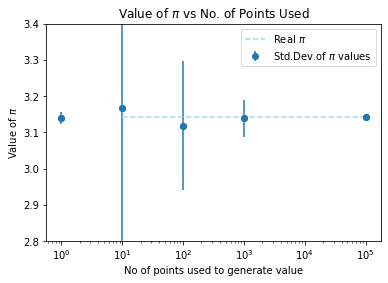

In [28]:
x = [10**1, 10**2, 10**3, 1**4, 10**5]
y = [3.168, 3.1184, 3.1382, 3.1397920000000004, 3.1417564000000002]
y_err = [0.520599654244987, 0.17778143885119166, 0.05082934585453566, 0.01671998612439616, 0.0050938151674358965]
plt.xscale('log')
plt.ylim([2.8,3.4])
plt.scatter(x,y)
plt.errorbar(x,y, yerr=y_err, fmt='o', label='Std.Dev.of $\pi$ values')
plt.hlines(np.pi, x[0], x[-1], linestyle='--', colors='lightblue', label='Real $\pi$')
plt.xlabel('No of points used to generate value')
plt.ylabel('Value of $\pi$')
plt.title('Value of $\pi$ vs No. of Points Used')
plt.legend(loc='upper right')
plt.show()